Nona Varnado: ESS 118

Final Project Oral Presentation:
             Wednesday, June 2

## Science Question: 

To investigate if Biogenic Volatile Organic Compounds (BVOCs), primarily
through isoprene, which accounts for 50% of global BVOC emissions, in the gas
phase (not aerosol), are linked to methane (ch4) lifetime. 

***NOTE: This notebook is for PiClim-2xVOC, which assumes twice the VOC emissions of
the first model experiment (PiClim-VOC) and see how ch4 compares between the two.***


In [5]:
#import necessary libraries to read data from a netcdf file
import numpy as np
import netCDF4
import matplotlib.pyplot as py
import xarray
import cartopy.feature 
from matplotlib import animation
from matplotlib.colors import LogNorm

In [6]:
# read in netcdf files. data obtained from: https://esgf-node.llnl.gov/
#This file represents PiClim-VOC baseline against preindustrial SSTs and forcing but with 2014 VOC emissions
filename1 = "ch4_Amon_CESM2-WACCM_piClim-2xVOC_r1i1p1f1_gn_000101-003212.nc"
nc_file1 = xarray.open_dataset(filename1) 

In [7]:
#use print to examine the file
print(nc_file1)

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, plev: 19, time: 384)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 0001-01-15 12:00:00 ... 0032-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    ch4        (time, plev, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float64 ...
    lon_bnds   (lon, nbnd) float64 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            AerChemMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  54385.0
    case_id:                1641
    ...                     ...
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.

In [21]:
# extract variables and put them into arrays from the nc_file object
ch4voc   = nc_file1["ch4"].data
time     = nc_file1["time"].data
lat      = nc_file1["lat"].data
lon      = nc_file1["lon"].data
plev     = nc_file1["plev"].data
lat_bnds = nc_file1["lat_bnds"].data

#check the shape for these variables
print(ch4voc.shape, lat.shape, lon.shape, plev.shape, lat_bnds.shape)

(384, 19, 192, 288) (192,) (288,) (19,) (192, 2)


In [22]:
#Use print to see the units used within the netCDF file
print(nc_file1['ch4'].units)
print(nc_file1['lat'].units)
print(nc_file1['lon'].units)
print(nc_file1['plev'].units)

#confirm the time period for the file and latitude bands
print("Start time:", time[0])
print("End time:", time[-1])
print("First lat middle", lat[0], lat_bnds[0,0], lat_bnds[0,1])

mol mol-1
degrees_north
degrees_east
Pa
Start time: 0001-01-15 12:00:00
End time: 0032-12-15 12:00:00
First lat middle -90.0 -90.0 -89.52879581151832


This is a 4D array, but to plot a contour map we need a 2D array. To do this the time array is set to 0, which still leaves us with a 3D array: Lat, Lon & Pressure Level, which corresponds to height in the atmosphere. Beyond the data management aspect of extracting the data into a map or for analysis, having ch4 contour levels by geopotential height indicates chemistry and transport. This is useful data in providing further context to the science question.

In [10]:
#first pressure level
ch4voc_test = ch4voc[:,0,:,:]
#check to see the shape for the created variable
print(ch4voc_test.shape)

#creates a mean ch4 map along array axis 0 - which corresponds to time 
#and requires creating new 2D array for map (below) 
mean_ch4bvoc3d = np.mean(ch4voc_test, axis =0)

filelen = len(ch4voc_test)
print("The file has ", filelen, "lines")

#confirm the new variable for the first pressure level has the right shape and dimensions
print(mean_ch4bvoc3d.shape)

(384, 192, 288)
The file has  384 lines
(192, 288)


In [11]:
#second pressure level

#this set up was established in the first plevel variable above. There is probably a more elegant way to
#process the data, but I couldn't figure out how so did it via the brute force method. 

ch4voc_test1 = ch4voc[:,1,:,:]

#always printing just in case something looks off...
print(ch4voc_test1.shape)
mean_ch4bvoc3d1 = np.mean(ch4voc_test1, axis =0)

(384, 192, 288)


In [12]:
#third pressure level
ch4voc_test2 = ch4voc[:,2,:,:]
print(ch4voc_test2.shape)
mean_ch4bvoc3d2 = np.mean(ch4voc_test2, axis =0)

(384, 192, 288)


In [13]:
#four pressure level
ch4voc_test3 = ch4voc[:,3,:,:]
print(ch4voc_test3.shape)
mean_ch4bvoc3d3 = np.mean(ch4voc_test3, axis =0)

(384, 192, 288)


In [14]:
#five pressure level
ch4voc_test4 = ch4voc[:,4,:,:]
print(ch4voc_test4.shape)
mean_ch4bvoc3d4 = np.mean(ch4voc_test4, axis =0)

(384, 192, 288)


In [15]:
#seven pressure level
  #NOTE: originally I created variables for all of the pressure levels but it became clear that taking every other
    # level would make it easier to read the notebook and avoid lag problems with the animation/gif functionality.
ch4voc_test6 = ch4voc[:,6,:,:]
print(ch4voc_test6.shape)
mean_ch4bvoc3d6 = np.mean(ch4voc_test6, axis =0)

(384, 192, 288)


In [16]:
#nine pressure level
ch4voc_test8 = ch4voc[:,8,:,:]
print(ch4voc_test8.shape)
mean_ch4bvoc3d8 = np.mean(ch4voc_test8, axis =0)

(384, 192, 288)


In [17]:
#eleven pressure level
ch4voc_test10 = ch4voc[:,10,:,:]
print(ch4voc_test10.shape)
mean_ch4bvoc3d10 = np.mean(ch4voc_test10, axis =0)

(384, 192, 288)


In [18]:
#thirteen pressure level
ch4voc_test12 = ch4voc[:,12,:,:]
print(ch4voc_test12.shape)
mean_ch4bvoc3d12 = np.mean(ch4voc_test12, axis =0)

(384, 192, 288)


In [19]:
#fifteen pressure level
ch4voc_test14 = ch4voc[:,14,:,:]
print(ch4voc_test14.shape)
mean_ch4bvoc3d14 = np.mean(ch4voc_test14, axis =0)

(384, 192, 288)


In [23]:
#seventeen pressure level
ch4voc_test16 = ch4voc[:,16,:,:]
print(ch4voc_test16.shape)
mean_ch4bvoc3d16 = np.mean(ch4voc_test16, axis =0)

(384, 192, 288)


In [38]:
#nineteen pressure level
ch4voc_test18 = ch4voc[:,18,:,:]
print(ch4voc_test18.shape)
mean_ch4bvoc3d18 = np.mean(ch4voc_test18, axis =0)

(384, 192, 288)


The plotting begins! This "level 0" is a wierd level - it's something less than sealevel? Further plots will all conform to the expected cartopy PlateCarree projection. It is also interesting to note that the slices have zero data for topography that exists at that level, (e.g. there can't be measurement data for a gas where a mountain is.)

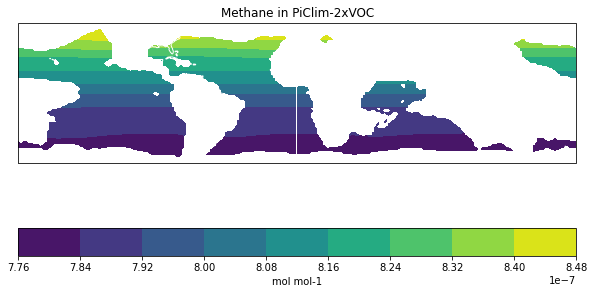

In [58]:
#contour map of averages in 2D for plev 0

#define cartopy plot and projection
fig = py.figure(figsize = (10,8))
ax1 = fig.add_subplot(projection=cartopy.crs.PlateCarree()) 
ax1.coastlines(color="white")

contour_plot = ax1.contourf(lon, lat, mean_ch4bvoc3d) #this is the only line that calls the specific data level

ax1.set_title("Methane in PiClim-2xVOC") #Title (pretty much the only unique bit of the notebook)
cbar = py.colorbar(contour_plot, orientation='horizontal') #place colorbar below to make the composition nicer
cbar.set_label('mol mol-1') #label color bar with the units from the netCDF file
py.show()

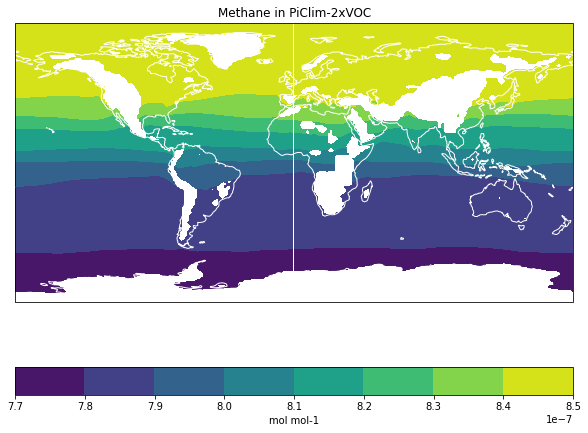

In [57]:
#contour map of averages in 2D for plev 1

fig = py.figure(figsize = (10,8))
ax1 = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax1.coastlines(color="white")

contour_plot = ax1.contourf(lon, lat, mean_ch4bvoc3d1)

ax1.set_title("Methane in PiClim-2xVOC")
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mol mol-1')

py.show()

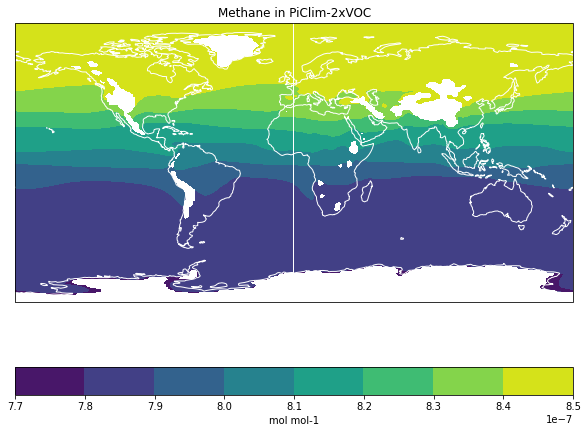

In [56]:
#contour map of averages in 2D for plev 2

fig = py.figure(figsize = (10,8))
ax1 = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax1.coastlines(color="white")

contour_plot = ax1.contourf(lon, lat, mean_ch4bvoc3d2)

ax1.set_title("Methane in PiClim-2xVOC")
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mol mol-1')

py.show()

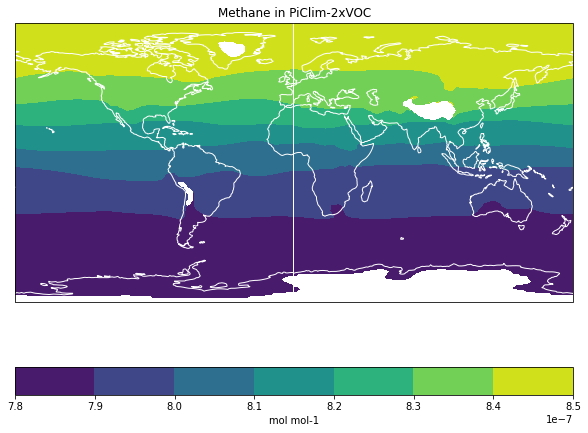

In [55]:
#contour map of averages in 2D for plev 3

fig = py.figure(figsize = (10,8))
ax1 = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax1.coastlines(color="white")

contour_plot = ax1.contourf(lon, lat, mean_ch4bvoc3d3)

ax1.set_title("Methane in PiClim-2xVOC")
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mol mol-1')

py.show()

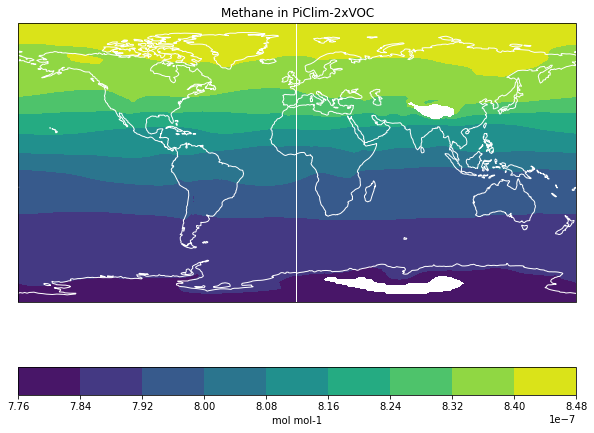

In [54]:
#contour map of averages in 2D for plev 4

fig = py.figure(figsize = (10,8))
ax1 = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax1.coastlines(color="white")

contour_plot = ax1.contourf(lon, lat, mean_ch4bvoc3d4)

ax1.set_title("Methane in PiClim-2xVOC")
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mol mol-1')

py.show()

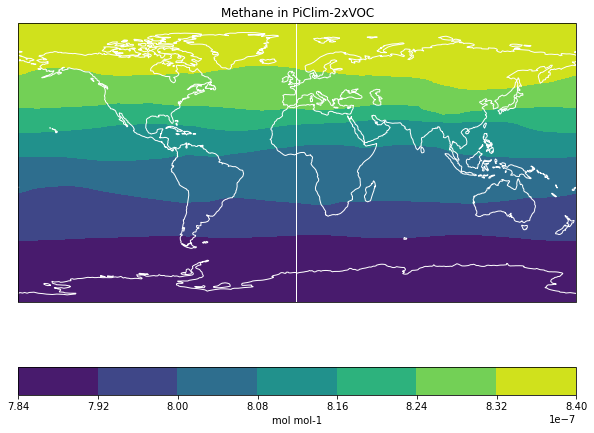

In [53]:
#contour map of averages in 2D for plev 7

fig = py.figure(figsize = (10,8))
ax1 = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax1.coastlines(color="white")

contour_plot = ax1.contourf(lon, lat, mean_ch4bvoc3d6)

ax1.set_title("Methane in PiClim-2xVOC")
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mol mol-1')

py.show()

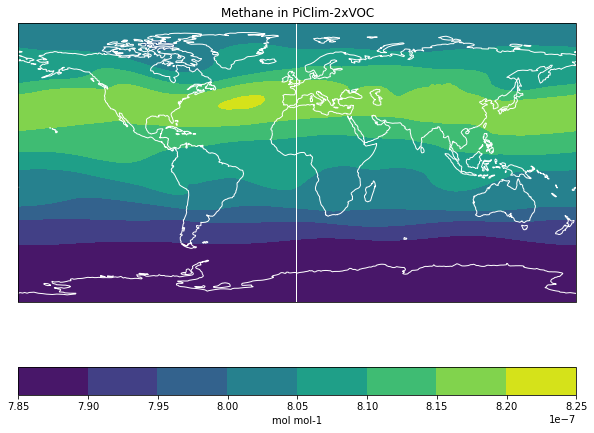

In [52]:
#contour map of averages in 2D for plev 9

fig = py.figure(figsize = (10,8))
ax1 = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax1.coastlines(color="white")

contour_plot = ax1.contourf(lon, lat, mean_ch4bvoc3d8)

ax1.set_title("Methane in PiClim-2xVOC")
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mol mol-1')

py.show()

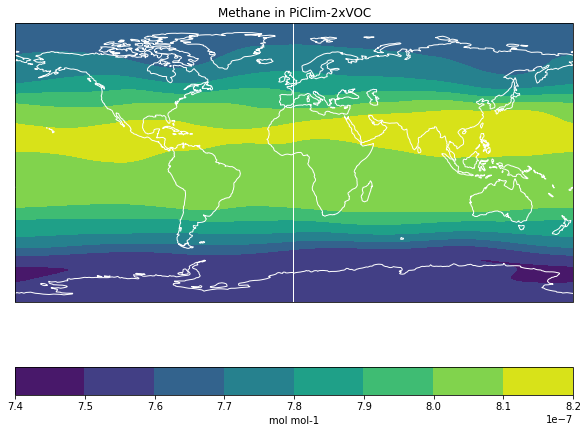

In [51]:
#contour map of averages in 2D for plev 11

fig = py.figure(figsize = (10,8))
ax1 = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax1.coastlines(color="white")

contour_plot = ax1.contourf(lon, lat, mean_ch4bvoc3d10)

ax1.set_title("Methane in PiClim-2xVOC")
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mol mol-1')

py.show()

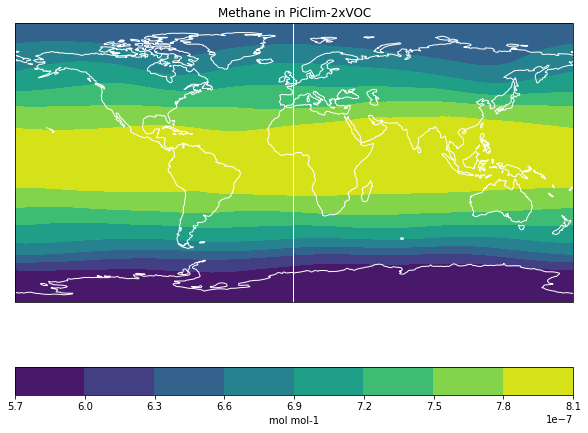

In [50]:
#contour map of averages in 2D for plev 13

fig = py.figure(figsize = (10,8))
ax1 = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax1.coastlines(color="white")

contour_plot = ax1.contourf(lon, lat, mean_ch4bvoc3d12)

ax1.set_title("Methane in PiClim-2xVOC")
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mol mol-1')

py.show()

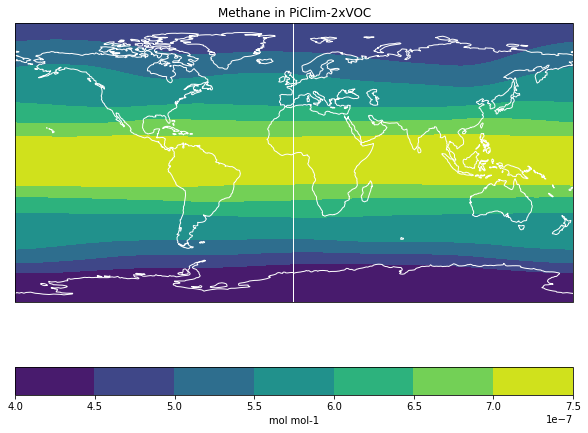

In [49]:
#contour map of averages in 2D for plev 15

fig = py.figure(figsize = (10,8))
ax1 = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax1.coastlines(color="white")

contour_plot = ax1.contourf(lon, lat, mean_ch4bvoc3d14)

ax1.set_title("Methane in PiClim-2xVOC")
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mol mol-1')

py.show()

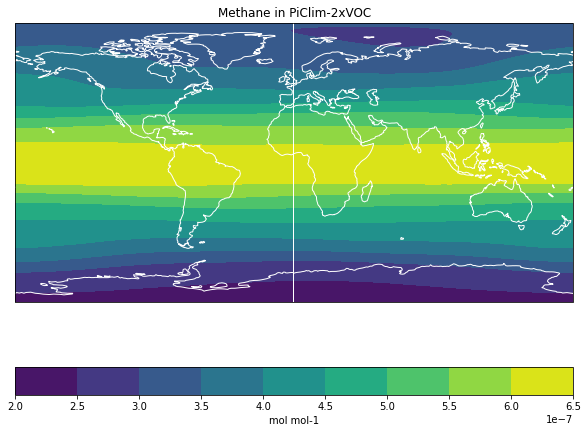

In [48]:
#contour map of averages in 2D for plev 17

fig = py.figure(figsize = (10,8))
ax1 = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax1.coastlines(color="white")

contour_plot = ax1.contourf(lon, lat, mean_ch4bvoc3d16)

ax1.set_title("Methane in PiClim-2xVOC")
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mol mol-1')

py.show()

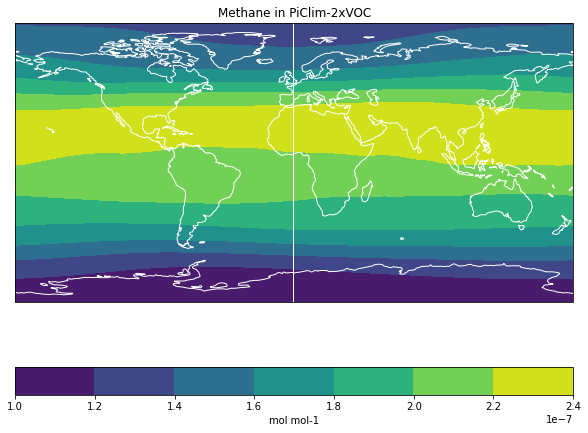

In [47]:
#contour map of averages in 2D for plev 19

fig = py.figure(figsize = (10,8))
ax1 = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax1.coastlines(color="white")

contour_plot = ax1.contourf(lon, lat, mean_ch4bvoc3d18)

ax1.set_title("Methane in PiClim-2xVOC")
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mol mol-1')

py.show()

This is interesting! According to the time data pulled out after importing the file, the time dimention is for 1 year (Jan 1 2015 - Dec 32 2015) but the graph bellow pulls out a multi-year projection. AND! appears to be plotting many indivivual variable (all of the ch4 points within the pressure level) rather than a single mean.  I would like some assistance in exploring how to isolate parts of this graph for clarity. 

(192, 288)


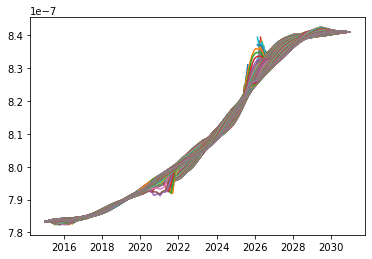

In [46]:
from matplotlib.axis import Axis

# next line slices array to extract time dimension variability by pressure level
methane = mean_ch4bvoc3d4 #figure out array variable from the first (0) pressure level
print (methane.shape)

# create a time array to plot ch4 time series
length    = len(methane)
timearray = np.zeros(length)
for i in range (length):
    timearray[i] = 2015.0 + i/12 + 1/24.0 #figure out time aspect
    
# A different kind of plot! 
fig = py.figure()
ax = py.axes()



ax.plot(timearray, methane);

This has been SUPER frustrating. I have tried to use the following guides to create an animation of the pressure levels to give a sense of how ch4 is present and variable through the atmosphere.

http://tech.weatherforce.org/blog/ecmwf-data-animation/index.html

https://github.com/NCAR/wrf_python_tutorial/blob/d6c635e69db920635db75966d0c9c4f7292b79d0/wrf_tutorial_march_2018/wrf_tutorial_march_2018.ipynb

http://keatonb.github.io/archivers/shanimate

https://holypython.com/how-to-save-matplotlib-animations-the-ultimate-guide/

This ultimate guide was kind enough to assure me that this usually goes wrong in the save attempt, alas, it did not get me to over come it...

In [ ]:
import cartopy.crs as ccrs

fig = py.figure(figsize=(10, 5))
ax = py.axes(projection=ccrs.PlateCarree())

nframes = 10 #number of frames per cycle
seconds = 1 #desired duration
interval = seconds/nframes
area = (lat,lon)

def draw(frame, add_colorbar):
    grid = area[frame]
    contour = grid.plot(ax=ax, transform=ccrs.PlateCarree(),
                        add_colorbar=add_colorbar, vmin=min_value, vmax=max_value)
    title = "ArChemMIP: ch4 in PiClim-VOC" % (ds.t2m.long_name, str(area.time[frame].values)[:19])
    ax.set_title(title)
    return contour

#initialize
def init():
    return draw(0, add_colorbar=True)

# animation function
def animate(frame):
    return draw(frame, add_colorbar=False)


ani = animation.FuncAnimation(fig, animate, nframes, interval=0.01, blit=False,
                              init_func=init, repeat=False)
#save output
#writergif = animation.PillowWriter()
#ani.save('images/ArChemMIP-ch4-in-PiClim-VOC.mp4', writer=writergif)
py.show()

#py.close(fig)

Again, a bit of failed ambition. I saw that 3D gridded visualizations are possible but I could not fit the data, so used a maths formula as a placeholder to ask the question. This was inspired by: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

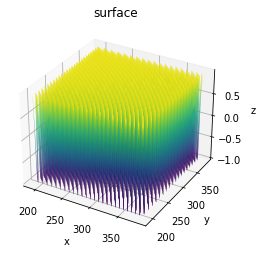

In [36]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(384, 192, 288)
y = np.linspace(384, 192, 288)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = py.figure()
ax = py.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');